# 8 Moving Beyond Nonlinearity and Nonparametric Regression


## Moving Beyond Nonlinearity

Here we introduce some nonlinear models.

### Generalized Linear Model

Recall generalized linear model characterizes a distribution. Let $\beta$ be some paramters, then 
$$\mathbb P(y|x_i) = f(x_i^T\beta).$$

### Polynomial Regression

The response might be a continuous function of $x_i$:

$$y_i=f(x_i)+\epsilon_i.$$


Bounded continuous function can be arbitrarily approximated by polynomials. So we can assume $f$ is a polynomial, e.g.
$$y_i=\beta_0+\beta_1 x_i+\beta_2 x_i^2+\dotsc +\beta_p x_i^p+\epsilon_i,$$
which can be solved by the method of multivariate regression. Its difficulty lies in the determination of the hyperparameter $p$, the degre of the polynomial.

### Step Functions

Bounded continuous function can also be arbitrarily approximated by step functions. If $x\in [a,b)$ and we divide the interval with $a=c_0<c_1<\dotsc <c_n=b$, then we can form the model 
$$y_i = \beta_0 + \beta_1 \mathbb I_{c_0\leqslant x_i<c_1}+\beta_2\mathbb I_{c_1\leqslant x_i<c_2}+\dotsc 
+\beta_n \mathbb I_{c_{n-1}\leqslant x_i<c_n}+\epsilon_i.$$

### Basis Functions

More generally, we can select some functions $f_1,f_2,\dotsc,f_n$ and form the following model
$$y_i = \beta_0+\sum_{k=1}^n\beta_k f_k(x_i)+\epsilon_i.$$

Polynomial regression and step functions are its special cases. Other methods include wavelet functions, Fourier and polynomial splines. See more about cubic splines in the course \<Numerical Algorithm and Case Studies II>.

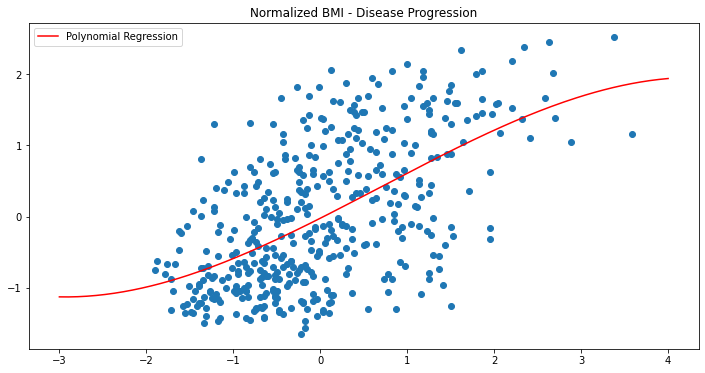

In [113]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
data = load_diabetes()
column = 2
x, y = data['data'][:,column], data['target']
x, y = (x - x.mean()) / (x.var() ** .5), (y - y.mean()) / (y.var() ** .5)

def PolyFit(x, X, Y, p = 1):
    """Fit a polynomial with degree = `p` on 1D data `(X,Y)` and predict on `x`."""
    expansion = lambda t: np.concatenate([t**i for i in range(p + 1)]).reshape((p+1, -1)).T
    x, X = expansion(x), expansion(X)
    beta = np.linalg.solve(X.T @ X, X.T @ y)
    return x @ beta

x2 = np.linspace(-3, 4, 200)
y2 = PolyFit(x2, x, y, p = 3)

plt.figure(figsize = (12, 6))
plt.scatter(x, y)
plt.plot(x2, y2, c = 'r')
plt.title('Normalized %s - %s'%(data['feature_names'][column].upper(), 'Disease Progression'))
plt.legend(['Polynomial Regression'])
plt.show()

## Smoothing

To suppress overfitting, we can add penalty terms. For example, we add regularization on the second derivative for smoothness.
$$\mathcal L' = \mathcal L+\lambda \Vert f''(x)\Vert_2^2.$$

### Natural Cubic Splines

Given data $(x_1,y_1),\dotsc,(x_n,y_n)$ and $x_1<x_2<\dotsc<x_n$ where $x_i,y_i\in\mathbb R$, the natural cubic spline is the function $f$ such that 
$$f(x) = a_ix^3+b_ix^2+c_ix+d_i\quad\quad (x\in [x_{i}, x_{i+1}))$$
and $\lim_{x\rightarrow x_i^-}f(x) = \lim_{x\rightarrow x_i^+}f(x)$ and $\lim_{x\rightarrow x_i^-}f'(x) = \lim_{x\rightarrow x_i^+}f'(x)$ and $f''(x_1) = f''(x_n) = 0$.

**Theorem** Let $x_1<x_2<\dotsc<x_n $. Then the minimizer $f$ for ${\argmin}_f \sum_{i=1}^n \left(y_i - f(x_i)\right)^2 +\lambda \int_{x_1}^{x_n} f''(x)^2dx$ with continuous second derivative is a natural cubic spline  as long as it exists.

**Proof** 

## Kernel Regression

Kernel regression is nonparametric. To start with, we introduce the Hölder class.

### Hölder Class

Define the Hölder class $H_d$, a function class, as follows:
$$H_d(\beta ,L) = \left\{g: \Vert D^s g(x) - D^sg(y)\Vert \leqslant L\Vert x - y\Vert,\quad \forall x,y\in\mathbb R^n\quad s_1+\dotsc+s_n=\beta - 1\right\}$$
where $D^s=\frac{\partial^{s_1+\dotsc+s_n}}{\partial x_1^{s_1}\dotsm\partial x_n^{s_n}}$ is the derivative operator.

For instance, $H_d(0,L)$ are Lipschitz functions.

### Nadaraya–Watson Kernel Regression

Let $K: \mathbb R\rightarrow \mathbb R_{\geqslant 0}$ be some kernel function, which is large at the origin but dwindles when faraway from the origin. E.g. $K = e^{-x^2}$. Then we estimate 
$$\hat y  = \sum_{i=1}^n \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}y_i.$$

This is called the (Nadaraya-Watson) [kernel regression](https://bookdown.org/egarpor/PM-UC3M/npreg-kre.html#npreg-kre-nw). The paramter $h$ is called the bandwidth.

The formula assign weights on $y_i$ and the data points that are near to $x$ has larger weights. Commonly selected kernel functions include Gaussian $\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$, box kernel $  \frac 12\mathbb I_{|x|\leqslant 1}$, Epanechnikov kernel $\frac{3}{4(1-x^2)}\mathbb I_{|x|\leqslant 1}$, etc.

### Local Constant Regression

Assume $x_1,\dotsc,x_n$ are in a neighborhood, and assume $\hat y$ is a constant in this neighborhood. If we wish to minimize the weighted sum of residuals:
$$\min_{\hat y\in\mathbb R}\sum_{i=1}^n \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}\left(y_i - \hat y\right)^2,$$
then the solution is given by 
$$\hat y  = \sum_{i=1}^n \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}y_i.$$

Hence, the Nadaraya-Watson kernel regression is **also called** local constant regression.


**Proof** This is a weighted least squares problem. Since it is convex with respect to $\hat y$, we can solve the minimum with derivative:
$$0=\frac{\partial f}{\partial \hat y}= -2\sum_{i=1}^n  \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}\left(y_i - \hat y\right).$$

Note that $\sum_{i=1}^n  \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}=1$, so it is clear that the extrema is reached when
$$\hat y^*  = \sum_{i=1}^n \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}y_i.$$


### Conditional Expectance

If we assume at each point $x$, the distribution of $y$ is discrete and given by
$$\mathbb P(y = y_i) = \frac{K\left(\frac{\Vert x-x_i\Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x-x_j\Vert}{h}\right)}
 \quad \quad (i=1,2,\dotsc,n).$$

Then it is clear that the Nadaraya-Watson estimator is the conditional expectance, $\hat y = \mathbb E(y|x)$.

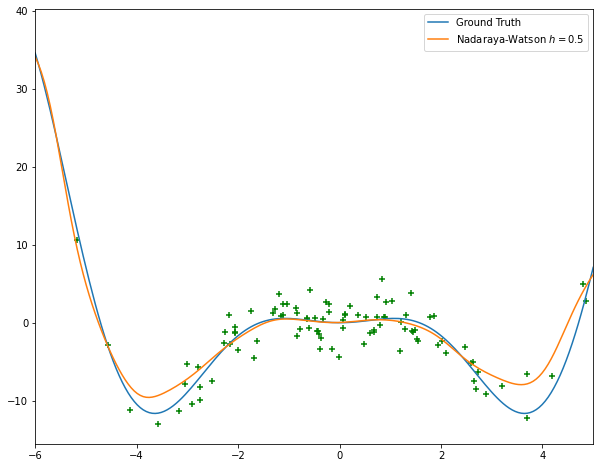

In [62]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(2023)
m = lambda x: x * x * np.cos(x) # underlying relation
n = 100
x = np.random.normal(size = n, scale = 2)
y = m(x) + np.random.normal(size = n, scale = 2)

def NW(x, X, Y, K = lambda z: np.exp(-z*z/2) * .3989423, h = 1):
    """Fit NW estimator on 1D data `(X,Y)` with
    kernel `K`, bandwidth `h` to predict on `x`."""
    weights = K((np.meshgrid(X, x)[1] - X) / h)
    return weights @ y / weights.sum(axis = 1)

plt.figure(figsize = (10, 8))
l, r = -6, 5 # for display
plt.xlim(l, r)
plt.scatter(x, y, marker = '+', c = 'green')
x2 = np.linspace(l, r, 187)
plt.plot(x2, m(x2))
plt.plot(x2, NW(x2, x, y, h = 0.5))
plt.legend(['Ground Truth', 'Nadaraya-Watson $h=0.5$'])
plt.show()

Two major concerns in constructing a kernel regression is the selection of the kernel function $K$ and bandwidth $h$.

### Variance and Roughness

Variance $\sigma^2$ and roughness $R$ are two important features of a kernel function $K$. They are defined by 
$$\sigma^2 = \int_{\mathbb R}z^2K(z)dz\quad\quad R = \int_{\mathbb R}K^2(z)dz.$$



### Local Linear Regression

Recall the rationale of local constant regression, we can also define the local linear regression (or even local polynomial regression) by 
$$\hat y (x)= \sum_{i=1}^n \frac{K\left(\frac{\Vert x - x_i \Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x - x_j\Vert}{h}\right)}
\left(\alpha +\beta^T x\right)$$
where $\alpha,\beta$ is the minimzer of $\min_{\alpha,\beta}L=\min_{\alpha,\beta} \sum_{i=1}^n\frac{K\left(\frac{\Vert x - x_i \Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x - x_j\Vert}{h}\right)}\left(y_i - \hat y(x_i)\right)^2$.

Define $W = {\rm diag}[\frac{K\left(\frac{\Vert x - x_i \Vert}{h}\right)}{\sum_{j=1}^n K\left(\frac{\Vert x - x_j\Vert}{h}\right)}]$ are the weights, then the solution to $\alpha,\beta$ are given by 
$$\left[\begin{matrix}\alpha & \beta^T\end{matrix}\right]
=y^TW\left[\begin{matrix} e & X\end{matrix}\right]\left(\left[\begin{matrix}e^T \\ X^T\end{matrix}\right]W\left[\begin{matrix} e & X\end{matrix}\right]\right)^{-1}.$$

**Proof** It suffices to compute the extremum. Note that $\mathcal L = (y - \hat y)W(y - \hat y) $ where $\hat y = e\alpha+ X\beta$ and $e=[1,1,\dotsc,1]^T$. Also, 
$\dfrac{\partial \hat y}{\partial \alpha} =e$, $\dfrac{\partial \hat y}{\partial \beta} = X,$
and 
$$\frac{\partial \mathcal L}{\partial \alpha} = -2(y - \hat y)^TWe
\quad\quad  \frac{\partial \mathcal L}{\partial \beta} = -2(y - \hat y)^TWX. $$
Simplify the equations and we obtain
$$\left[\begin{matrix}\alpha & \beta^T\end{matrix}\right]
\left[\begin{matrix}e^T \\ X^T\end{matrix}\right]W\left[\begin{matrix} e & X\end{matrix}\right]
=y^TW\left[\begin{matrix} e & X\end{matrix}\right].
$$